# Gradient Boosting 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 
import warnings 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')
warnings.filterwarnings(action="ignore")


In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning
from PreprocessDataFrame import PreprocessDataFrame

In [3]:
setup_df         =   SetupDataFrame()
analyze_df       =   AnalyzeDataFrame()
visualize_df     =   VisualizeDataFrame()
eval_model       =   EvalModel()
hp_tuning_model  =   HyperParameterTuning()
preprocess_model =   PreprocessDataFrame()

In [4]:
df = setup_df.setup_ml("18-concrete_data.csv")

In [5]:
analyze_df.check_df(df)

***************************************** SHAPE ******************************************
(1030, 9)
***************************************** TYPES ******************************************
Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object
****************************************** HEAD ******************************************
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggr

In [6]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes:

In [7]:
df.columns = df.columns.str.upper()

In [8]:
df.columns = df.columns.str.replace(" ", "_", regex=False)

In [9]:
df.columns

Index(['CEMENT', 'BLAST_FURNACE_SLAG', 'FLY_ASH', 'WATER', 'SUPERPLASTICIZER',
       'COARSE_AGGREGATE', 'FINE_AGGREGATE', 'AGE', 'STRENGTH'],
      dtype='object')

In [10]:
cat_cols, num_cols, _ = analyze_df.grab_col_names(df)

Observations: 1030
Variables: 9
cat_cols: 0
num_cols: 9
cat_but_car: 0
num_but_cat: 0

Categorical Cols: []

Numerical Cols: ['CEMENT', 'BLAST_FURNACE_SLAG', 'FLY_ASH', 'WATER', 'SUPERPLASTICIZER', 'COARSE_AGGREGATE', 'FINE_AGGREGATE', 'AGE', 'STRENGTH']

Categorical but cardinal Cols: []


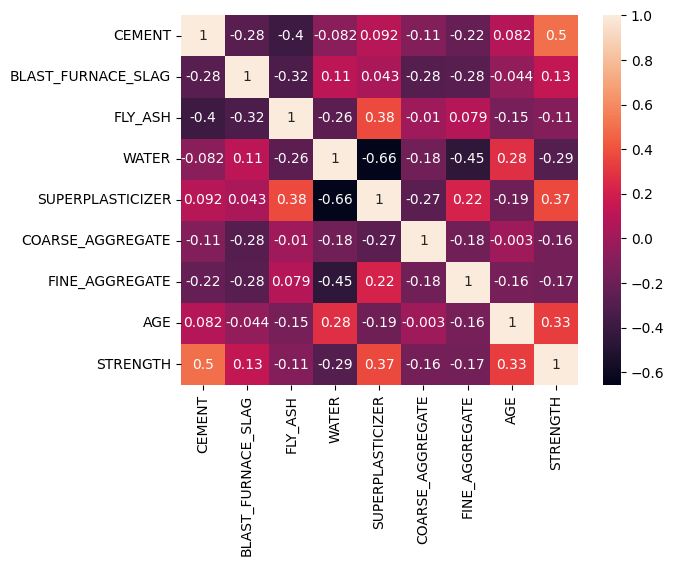

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
analyze_df.correlation_for_drop(df)

set()

In [13]:
num_cols.remove("STRENGTH")

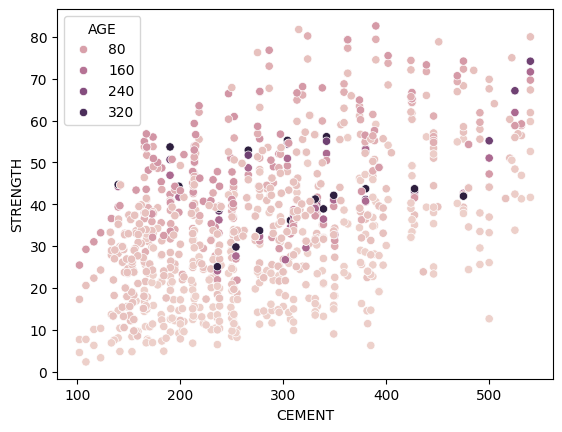

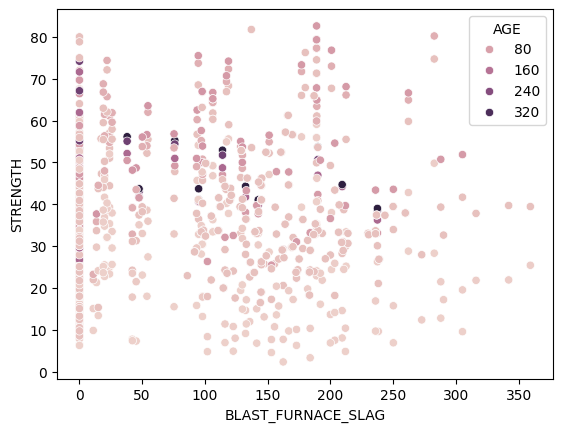

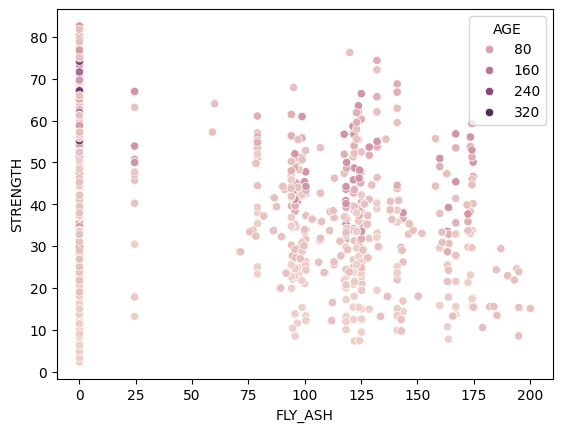

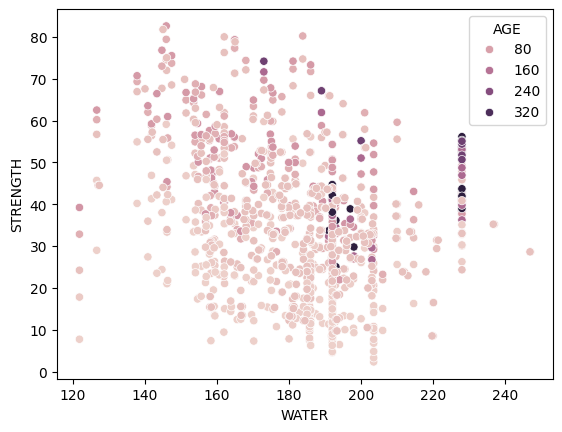

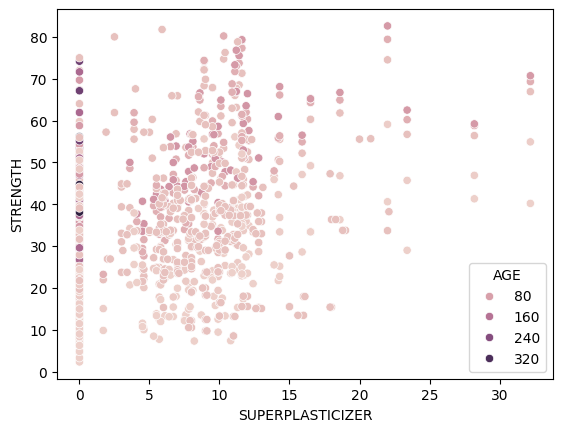

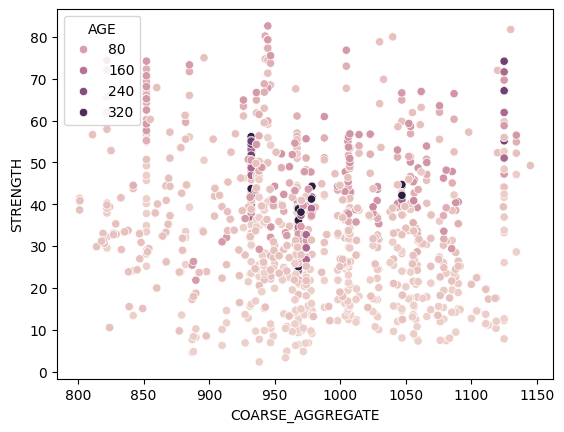

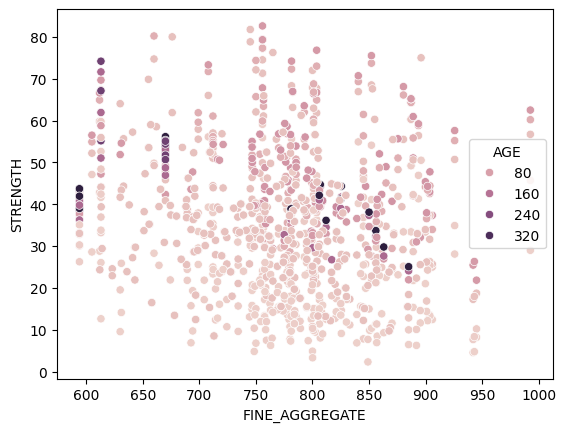

In [14]:
for col in num_cols:
    if col == "AGE":
        continue
    visualize_df.scatterplot_maker(df, col, "STRENGTH", data_hue="AGE")

In [15]:
X = df.drop("STRENGTH", axis=1)
y = df["STRENGTH"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [19]:
eval_model.base_regression_models(X_train, y_train, scoring="r2")

Base Regression Models...
r2: 0.5301 (Linear) 
r2: 0.5301 (Ridge) 
r2: 0.5285 (Lasso) 
r2: 0.4285 (KNN) 
r2: 0.4801 (CART) 
r2: 0.7527 (RF) 
r2: 0.686 (AdaBoost) 
r2: 0.8091 (GBM) 
r2: 0.7519 (XGBoost) 
